#Praktikum 1 (Bagging)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/wbc.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
#seleksi fitur
#Slice dataframe mulai dari kolom 'radius_mean' sampai 'fractal dimension word'
X = df.iloc[:,3:-1]
y = df['diagnosis']
y = y.map({'M':1, 'B':0}) # Encode label

# Cek jumlah fitur dan instance
X.shape

(569, 29)

In [ ]:
#split data trainig dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#taining decision tree
dt = DecisionTreeClassifier()

# Fit ke model
dt.fit(X_train, y_train)

# Prediksi label pada test
y_pred_dt = dt.predict(X_test)

# Evaluasi akurasi
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.96
Test set accuracy: 0.9649122807017544


In [ ]:
#training Random Forest

rf = RandomForestClassifier(n_estimators=10, random_state=1)

#sesuaikan label set test
rf.fit(X_train, y_train)

#memprediksi label set test
y_pred_rf = rf.predict(X_test)

#menghitung accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.96
Test set accuracy: 0.956140350877193


#Praktikum 2 (Boosting)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import AdaBoostClassifier # import AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Kebutuhan encoding label

In [ ]:
#import data
df = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().sum() #cek kolom null

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#seleksi fitur
X = df.iloc[:,2:-1]
y = df['Species']

#encode label
ec = LabelEncoder()
y = ec.fit_transform(y)

#cek jumlah fitur dan instance
print(X.shape)

#cek label
print(y)

(150, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
#split data trining dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#training Decision Tree
dt = DecisionTreeClassifier()

#sesuaikan dt ke set training
dt.fit(X_train, y_train)

#mempresiksi label set test
y_pred_dt = dt.predict(X_test)

#menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


In [ ]:
#training AdaBoost

ada = AdaBoostClassifier(n_estimators=2)

#sesuaikan dt ke set training
ada.fit(X_train, y_train)

#memprediksi label set test
y_pred_ada = ada.predict(X_test)

#menghitung set accuracy
acc_ada = accuracy_score(y_test, y_pred_ada)
print("Test set accuracy: {:.2f}".format(acc_ada))
print(f"Test set accuracy: {acc_ada}")

Test set accuracy: 0.97
Test set accuracy: 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#Praktikum 3 (Stacking)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#layer 1 (10 pohon Random Forest dan 5 KNN)
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))
                       ]
#Layer 2 (Decision tree, Random Forest 50 pohon, dan Logistic Regresion)
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

#Membuat Model stacking terakhir
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

#train Model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)


0.8947368421052632

#Praktikum 4 (Stacking dangan Voting)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB # import Naive Bayes model Gaussian (asumsi data terdistribusi normal)
from sklearn.svm import SVC # import SVM classifier
from sklearn.ensemble import VotingClassifier # import model Voting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#import data
dbt = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/diabetes.csv')

dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#cek nama kolom
dbt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#cek kolom kosong
dbt.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#cek kolom neng nilai 0
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(dbt.loc[dbt[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [ ]:
#inpute nilai 0 dengan aman

from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

dbt[feature_columns] = fill_values.fit_transform(dbt[feature_columns])


In [ ]:
#Split data training dan testing
X = dbt[feature_columns]
y = dbt.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Training dengan GaussianNB

#Standarisasi Fitur
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#Menstandarisasi Fitur
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
#Training dan Evaluasi

#buat objek gaussianNB
gnb_std = GaussianNB()

#fit model
gnb_std.fit(X_train_std, y_train)

#prediksi dengan data
y_pred_gnb = gnb_std.predict(X_test_std)

#evaluasi akurasi testing data
acc_gnb = accuracy_score(y_test, y_pred_gnb)

#print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_gnb))
print(f"Test set accuracy: {acc_gnb}")

Test set accuracy: 0.74
Test set accuracy: 0.7359307359307359


In [ ]:
#training dengan SVM Linier

#model SVM linier tanpa tunning hyperparameter
svm_lin = SVC(kernel='linear')

#fit ke model
svm_lin.fit(X_train_std, y_train)

#prediksi
y_pred_svm_lin = svm_lin.predict(X_test_std)

#evaluasi akurasi testing data
acc_svm_lin = accuracy_score(y_test, y_pred_svm_lin)

#print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_lin))
print(f"Test set accuracy: {acc_svm_lin}")


Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


In [ ]:
#training dengan SVM RBF

#Model SVM RBF tanpa tunning hyperparameter
svm_rbf = SVC(kernel='rbf')

# Fit model
svm_rbf.fit(X_train_std, y_train)

# Prediksi
y_pred_svm_rbf = svm_rbf.predict(X_test_std)

# Evaluasi akurasi testing data
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

# Print hasil evaluasi
print("Test set accuracy: {:.2f}".format(acc_svm_rbf))
print(f"Test set accuracy: {acc_svm_rbf}")


Test set accuracy: 0.72
Test set accuracy: 0.7229437229437229


In [ ]:
# Definisikan algoritma yang akan digunakan untuk voting

clf1 = GaussianNB()
clf2 = SVC(kernel='linear')
clf3 = SVC(kernel='rbf', probability=True)

# model hard voting
voting = VotingClassifier(estimators=[('GaussianNB', clf1), ('SVM-LIN', clf2), ('SVM-RBF', clf3)], voting='hard')

# Fit model
voting.fit(X_train_std, y_train)

# Prediksi
y_pred_vt1 = voting.predict(X_test_std)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print("Test set accuracy: {:.2f}".format(acc_vt1))
print(f"Test set accuracy: {acc_vt1}")

Voting Hard
Test set accuracy: 0.74
Test set accuracy: 0.7402597402597403


#Tugas 1

Terdapat dataset mushroom. Berdasarkan dataset yang tersebut, bandingkan peforma antara algoritma Decision Tree dan RandomForest. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load Data
data =  pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#Encoding Fitur Kategorial
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [ ]:
#Split data training dan data testing
X = data.drop('class', axis=1)
y = data['class']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Decision tree dengan GrindSearchCV

In [ ]:
dt_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

##Evaluasi Decision Tree

In [ ]:
# Decision Tree hasil
print("Decision Tree Results:")
print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best cross-validation accuracy: {dt_grid.best_score_:.4f}")
dt_pred = dt_grid.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Results:
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation accuracy: 1.0000
Test accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



##Random Forest dengan grindSearchCV

In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

##Evaluasi hasilRandom Forest

In [ ]:
# Random Forest hasil
print("\nRandom Forest Results:")
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best cross-validation accuracy: {rf_grid.best_score_:.4f}")
rf_pred = rf_grid.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Results:
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 1.0000
Test accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



##visualisasi

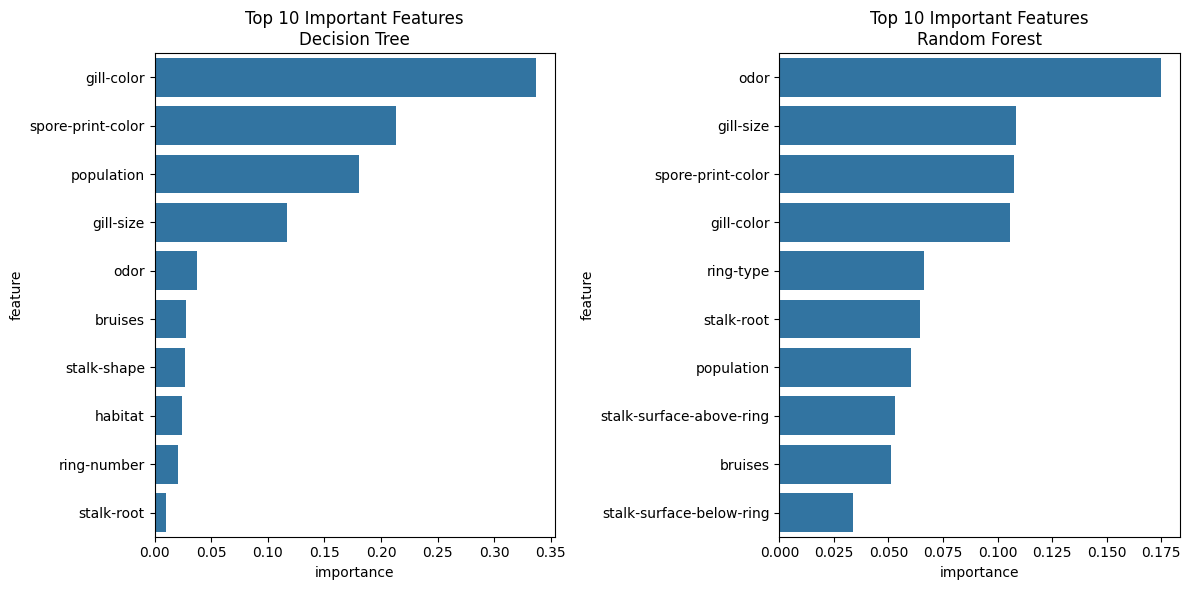

In [ ]:
# Decision Tree feature importance
dt_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_grid.best_estimator_.feature_importances_
})
dt_importance = dt_importance.sort_values('importance', ascending=False)

# Random Forest feature importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_grid.best_estimator_.feature_importances_
})
rf_importance = rf_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=dt_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Important Features\nDecision Tree')

plt.subplot(1, 2, 2)
sns.barplot(data=rf_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Important Features\nRandom Forest')
plt.tight_layout()
plt.show()

#Tugas 2

Terdapat dataset mushroom. Berdasarkan dataset tersebut, bandingkan peforma antara algoritma Decision Tree dan AdaBoost. Gunakan tunning hyperparameter untuk mendapatkan parameter dan akurasi yang terbaik.

In [ ]:
#Load dan preprocessing data

data =  pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/mushrooms.csv')

# Encoding fitur kategorikal
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Pisahkan fitur dan target
X = data.drop('class', axis=1)
y = data['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#AdaBoost dengan GridSearchCV
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [ # Changed 'base_estimator' to 'estimator'
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ]
}

ada = AdaBoostClassifier(random_state=42)
ada_grid = GridSearchCV(ada, ada_params, cv=5, scoring='accuracy', n_jobs=-1)
ada_grid.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=2),
                                       DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:

# Evaluasi dan perbandingan model

# AdaBoost hasil
print("\nAdaBoost Results:")
print(f"Best parameters: {ada_grid.best_params_}")
print(f"Best cross-validation accuracy: {ada_grid.best_score_:.4f}")
ada_pred = ada_grid.predict(X_test)
print(f"Test accuracy: {accuracy_score(y_test, ada_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, ada_pred))




AdaBoost Results:
Best parameters: {'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1.0, 'n_estimators': 50}
Best cross-validation accuracy: 1.0000
Test accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



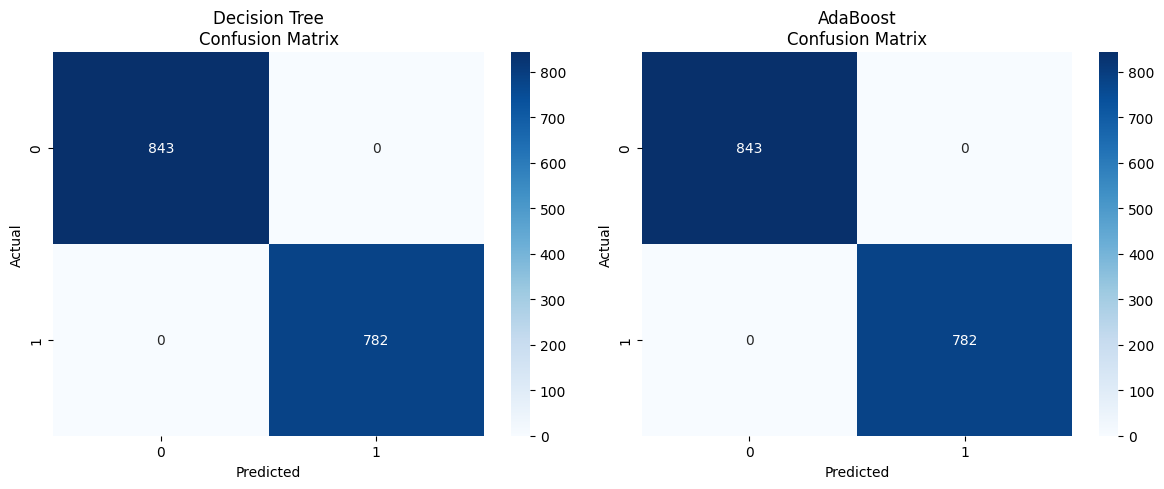

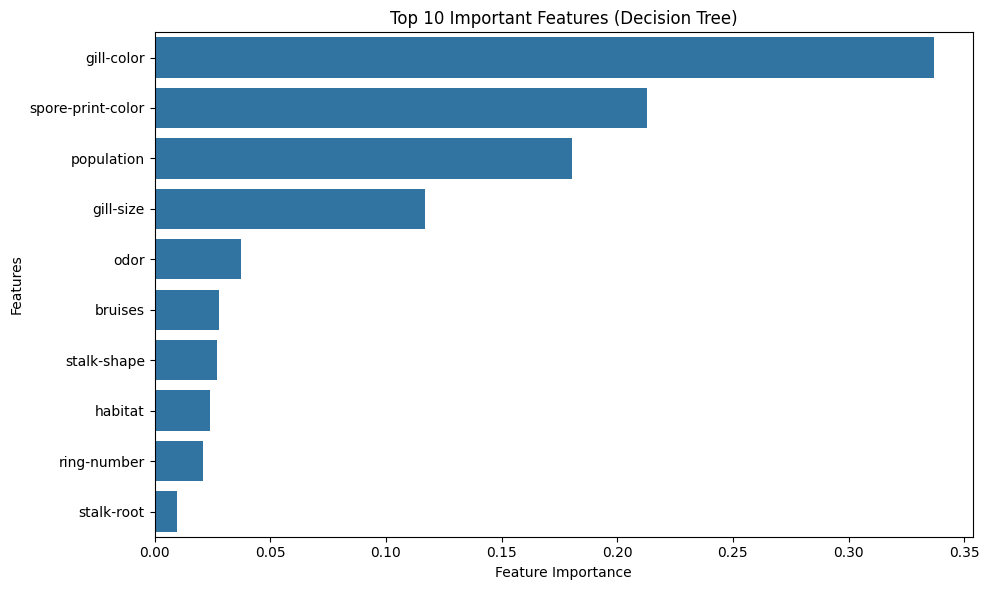

In [ ]:
# Visualisasi hasil
# Confusion Matrix untuk kedua model
plt.figure(figsize=(12, 5))

# Decision Tree Confusion Matrix
plt.subplot(1, 2, 1)
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# AdaBoost Confusion Matrix
plt.subplot(1, 2, 2)
ada_cm = confusion_matrix(y_test, ada_pred)
sns.heatmap(ada_cm, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Feature importance untuk Decision Tree
dt_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_grid.best_estimator_.feature_importances_
})
dt_importance = dt_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=dt_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Important Features (Decision Tree)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

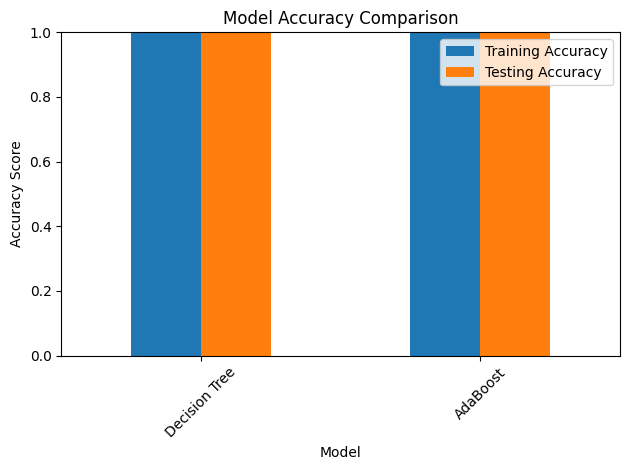

In [ ]:
#Perbandingan akurasi
comparison_data = pd.DataFrame({
    'Model': ['Decision Tree', 'AdaBoost'],
    'Training Accuracy': [dt_grid.best_score_, ada_grid.best_score_],
    'Testing Accuracy': [accuracy_score(y_test, dt_pred), accuracy_score(y_test, ada_pred)]
})

plt.figure(figsize=(8, 6))
comparison_data.plot(x='Model', y=['Training Accuracy', 'Testing Accuracy'], kind='bar')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Tugas 3

Dengan menggunakan dataset diabetes, buatlah ensemble voting dengan algoritma

 - Logistic Regression

 - SVM kernel polynomial

 - Decission Tree

Anda boleh melakukan eksplorasi dengan melakukan tunning hyperparameter

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Data Preparation
data = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/diabetes.csv')

#pisahkan fitur dan target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

#standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#Hyperparameter tunning untuk setiap model

# Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]
}
lr = LogisticRegression(random_state=42)
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)
print("\nLogistic Regression best parameters:", lr_grid.best_params_)
print("Logistic Regression best score:", lr_grid.best_score_)

# SVM dengan kernel polynomial
svm_params = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'coef0': [0, 1]
}
svm = SVC(kernel='poly', probability=True, random_state=42)
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)
print("\nSVM best parameters:", svm_grid.best_params_)
print("SVM best score:", svm_grid.best_score_)

# Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)
print("\nDecision Tree best parameters:", dt_grid.best_params_)
print("Decision Tree best score:", dt_grid.best_score_)


Logistic Regression best parameters: {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}
Logistic Regression best score: 0.7655071304811408

SVM best parameters: {'C': 0.1, 'coef0': 1, 'degree': 4, 'gamma': 'scale'}
SVM best score: 0.7703985072637611

Decision Tree best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree best score: 0.7606424097027855


In [ ]:
#Membuat Voting Classifier
# Menggunakan model-model terbaik dari hasil tuning
best_lr = lr_grid.best_estimator_
best_svm = svm_grid.best_estimator_
best_dt = dt_grid.best_estimator_

# Membuat soft voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm),
        ('dt', best_dt)
    ],
    voting='soft'
)

# Melatih voting classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, max_iter=1000,
                                                 random_state=42)),
                             ('svm',
                              SVC(C=0.1, coef0=1, degree=4, kernel='poly',
                                  probability=True, random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     min_samples_leaf=4,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
#evalusai model

#function evaluasi model
def evaluate_model(model, X_test, y_test, name, X_train, y_train): # Added name, X_train, and y_train as arguments
    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Hitung akurasi
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\n{name} Results:") # Use the name argument here
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    return train_acc, test_acc, y_test_pred

# Evaluasi setiap model
results = {}
models = {
    'Logistic Regression': best_lr,
    'SVM': best_svm,
    'Decision Tree': best_dt,
    'Voting Classifier': voting_clf
}

for name, model in models.items():
    train_acc, test_acc, y_pred = evaluate_model(model, X_test, y_test, name, X_train, y_train) # Pass all required arguments
    results[name] = {'train_acc': train_acc, 'test_acc': test_acc, 'predictions': y_pred}


Logistic Regression Results:
Training Accuracy: 0.7704
Testing Accuracy: 0.7532

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


SVM Results:
Training Accuracy: 0.8355
Testing Accuracy: 0.7662

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154


Decision Tree Results:
Training Accuracy: 0.7752
Testing Accuracy: 0.7662

Classification Report:
              precision    recall  f1-score   support

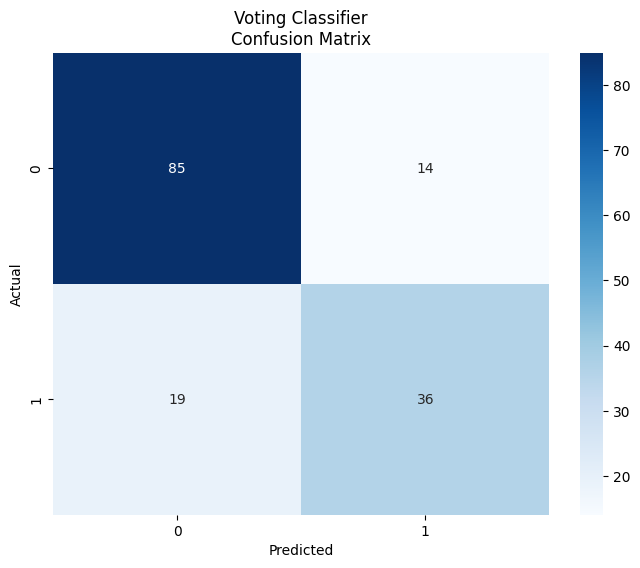

<Figure size 1000x600 with 0 Axes>

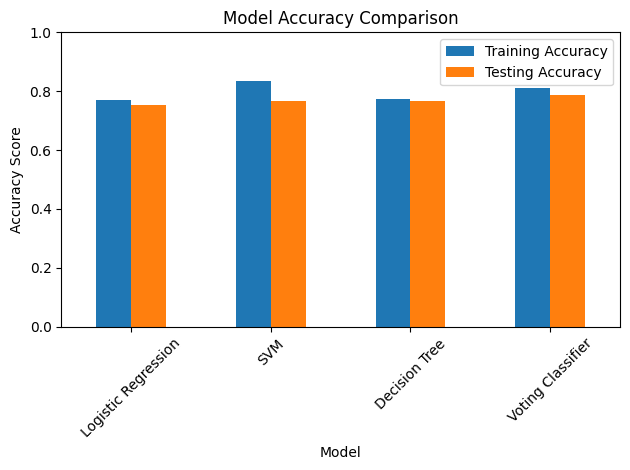

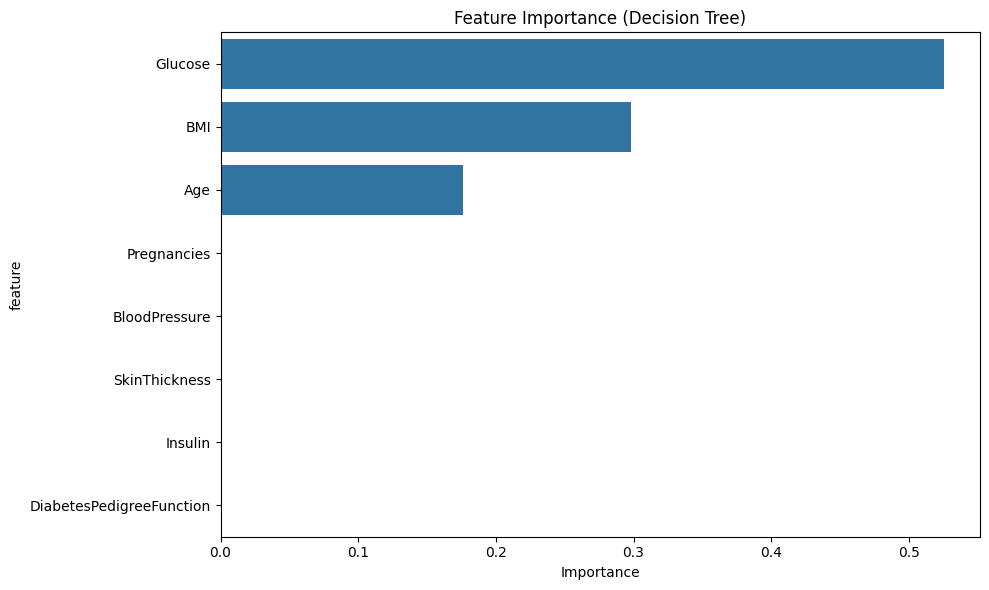

In [ ]:
#evaluasi hasil

# Confusion Matrix untuk Voting Classifier
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, results['Voting Classifier']['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Voting Classifier\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Perbandingan akurasi semua model
comparison_data = pd.DataFrame({
    'Model': list(results.keys()),
    'Training Accuracy': [results[model]['train_acc'] for model in results],
    'Testing Accuracy': [results[model]['test_acc'] for model in results]
})

plt.figure(figsize=(10, 6))
comparison_data.plot(x='Model', y=['Training Accuracy', 'Testing Accuracy'], kind='bar')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Importance untuk Decision Tree
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()
